# Logistic Regression Model Comparisons - Lab

## Introduction

In this lab, you'll investigate using scikit-learn with regularization in order to produce better models.

## Objectives

- Compare the different inputs with logistic regression models and determine the optimal model 

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

## Import the data

Import the dataset stored in `'heart.csv'`.

In [ ]:
# Import the data

df = pd.read_csv('heart.csv')


# Print the first five rows of the data
print(df.head())





        age  sex        cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  0.708333  1.0  1.000000  0.481132  0.244292  1.0      0.0  0.603053    0.0   
1  0.166667  1.0  0.666667  0.339623  0.283105  0.0      0.5  0.885496    0.0   
2  0.250000  0.0  0.333333  0.339623  0.178082  0.0      0.0  0.770992    0.0   
3  0.562500  1.0  0.333333  0.245283  0.251142  0.0      0.5  0.816794    0.0   
4  0.583333  0.0  0.000000  0.245283  0.520548  0.0      0.5  0.702290    1.0   

    oldpeak  slope   ca      thal  target  
0  0.370968    0.0  0.0  0.333333     1.0  
1  0.564516    0.0  0.0  0.666667     1.0  
2  0.225806    1.0  0.0  0.666667     1.0  
3  0.129032    1.0  0.0  0.666667     1.0  
4  0.096774    1.0  0.0  0.666667     1.0  


## Split the data

Define `X` and `y` where the latter is the `target` variable. This time, follow best practices and also implement a standard train-test split. Assign 25% to the test set and set the `random_state` to 17. 

In [3]:
# Define X and y
y = df['target']
X = df.drop(columns=['target'])


# Split the data into training and test sets


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=17, stratify=y)
print(y_train.value_counts(),'\n\n', y_test.value_counts())

target
1.0    124
0.0    103
Name: count, dtype: int64 

 target
1.0    41
0.0    35
Name: count, dtype: int64


## Initial Model - scikit-learn

Use scikit-learn to build the logistic regression model.

Turn off the intercept and set the regularization parameter, `C`, to a ridiculously large number such as 1e16. 

In [ ]:
# Your code here
#Turn off the intercept and set the regularization parameter, `C`, to a ridiculously large number such as 1e16. 

Log_reg = LogisticRegression() #instantiate the model
Log_reg.fit(X_train, y_train) #fit the model with data
y_pred = Log_reg.predict(X_test) #predict the labels of the test set
print(y_pred) #print the predicted labels





[0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 1. 1. 1. 1.]


## Create an ROC Curve for the scikit-learn model

Use both the training and test sets.

Train AUC: 0.9117601002192296
Test AUC: 0.9212543554006969


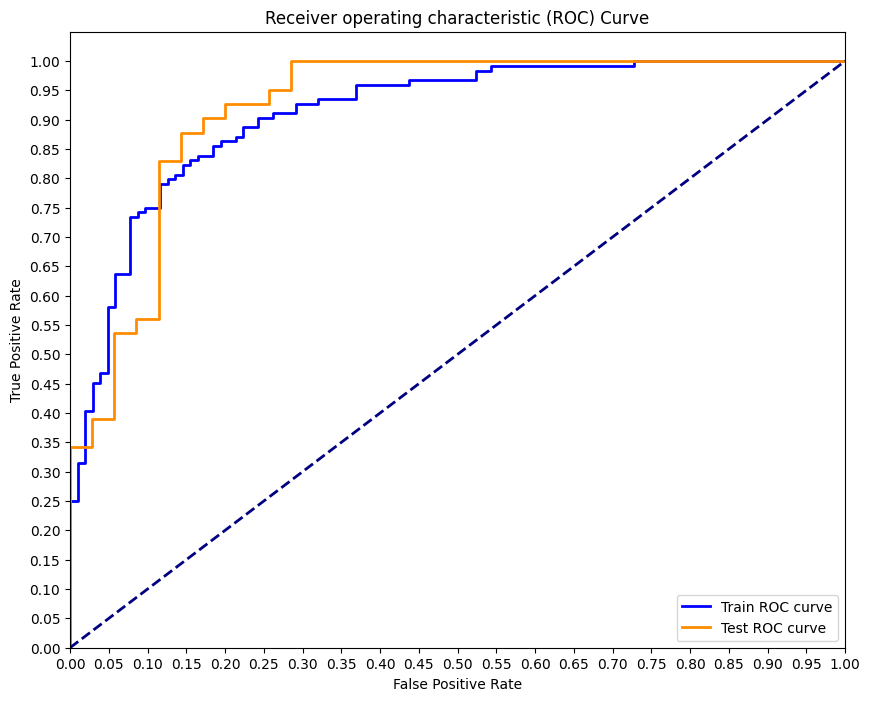

In [7]:
# Your code here
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt


y_train_score = roc_curve(y_train, Log_reg.predict_proba(X_train)[:, 1])

y_test_score = roc_curve(y_test, Log_reg.predict_proba(X_test)[:, 1])


train_fpr, train_tpr, train_thresholds = y_train_score
test_fpr, test_tpr, test_thresholds = y_test_score


print('Train AUC: {}'.format(auc(train_fpr, train_tpr)))
print('Test AUC: {}'.format(auc(test_fpr, test_tpr)))

plt.figure(figsize=(10, 8))
lw = 2

plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Train ROC curve')
plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Test ROC curve')

plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

This is a **Receiver Operating Characteristic (ROC) curve** comparing the model’s performance on the **training set (blue curve)** and the **test set (orange curve)**.

Here’s what it shows:

* **X-axis (False Positive Rate, FPR):** proportion of negative cases incorrectly classified as positive.
* **Y-axis (True Positive Rate, TPR):** proportion of positive cases correctly classified (also called recall or sensitivity).
* **Diagonal dashed line:** represents random guessing (no skill baseline). A good model should lie above this line.

### Observations:

1. **Both curves (train and test) are well above the diagonal**, meaning the model is performing significantly better than random guessing.
2. **Train curve (blue):** Very close to the top-left corner (high TPR, low FPR), suggesting strong predictive power.
3. **Test curve (orange):** Also performs very well, slightly below the training curve, which is expected — but still maintains a high TPR and low FPR.
4. **Generalization:** The gap between train and test curves is not very large, indicating the model generalizes well and is not severely overfitting.

👉 If you also compute the **AUC (Area Under the Curve)** for both curves, you’ll get a single summary score (closer to 1.0 is better).




## Add an Intercept

Now add an intercept to the scikit-learn model. Keep the regularization parameter `C` set to a very large number such as 1e16. 

In [8]:
# Create new model
logregi = LogisticRegression(C=1e16, fit_intercept=False, random_state=17)
logregi.fit(X_train, y_train)



LogisticRegression(C=1e+16, fit_intercept=False, random_state=17)

Generate predictions for the training and test sets.

In [9]:
# Generate predictions
y_hat_train = logregi.predict(X_train)

y_hat_test = logregi.predict(X_test)
print(y_hat_train)
print(y_hat_test)


[1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0.
 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1.
 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0.
 1. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0.
 1. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0.
 0. 1. 1. 1.]


Plot all three models ROC curves on the same graph.

Custom Model Test AUC: 0.8735191637630662
Custome Model Train AUC: 0.8221891637958033
Scikit-learn Model 1 Test AUC: 0.9261324041811847
Scikit-learn Model 1 Train AUC: 0.9148136548700282
Scikit-learn Model 2 with intercept Test AUC: 0.9261324041811847
Scikit-learn Model 2 with intercept Train AUC: 0.9148136548700282


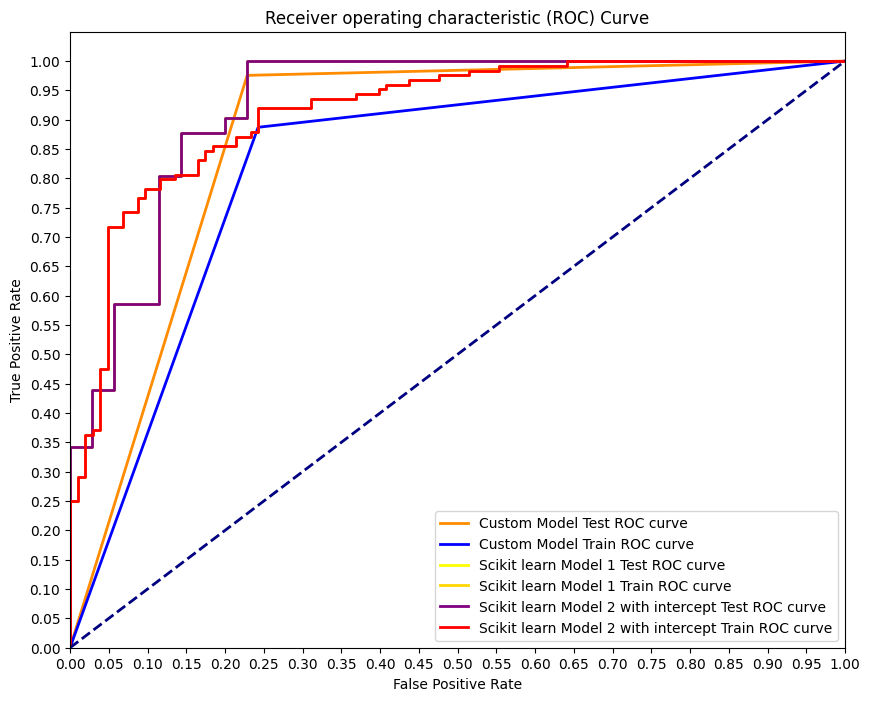

In [12]:
# Initial model plots
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_hat_test)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_hat_train)


print('Custom Model Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Custome Model Train AUC: {}'.format(auc(train_fpr, train_tpr)))

plt.figure(figsize=(10,8))
lw = 2

plt.plot(test_fpr, test_tpr, color='darkorange',
         lw=lw, label='Custom Model Test ROC curve')
plt.plot(train_fpr, train_tpr, color='blue',
         lw=lw, label='Custom Model Train ROC curve')


# Second model plots
y_test_score = logregi.decision_function(X_test)
y_train_score = logregi.decision_function(X_train)

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 1 Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 1 Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='yellow',
         lw=lw, label='Scikit learn Model 1 Test ROC curve')
plt.plot(train_fpr, train_tpr, color='gold',
         lw=lw, label='Scikit learn Model 1 Train ROC curve')


# Third model plots
y_test_score =  logregi.predict_proba(X_test)[:, 1]
y_train_score = logregi.predict_proba(X_train)[:, 1]

test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_score)
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_score)

print('Scikit-learn Model 2 with intercept Test AUC: {}'.format(auc(test_fpr, test_tpr)))
print('Scikit-learn Model 2 with intercept Train AUC: {}'.format(auc(train_fpr, train_tpr)))


plt.plot(test_fpr, test_tpr, color='purple',
         lw=lw, label='Scikit learn Model 2 with intercept Test ROC curve')
plt.plot(train_fpr, train_tpr, color='red',
         lw=lw, label='Scikit learn Model 2 with intercept Train ROC curve')

# Formatting
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Sure! Here's a detailed breakdown of the image you uploaded, which is a plot of **Receiver Operating Characteristic (ROC) curves**:

---

### 📊 What the Plot Shows

- **Axes**:
  - **X-axis**: False Positive Rate (FPR)
  - **Y-axis**: True Positive Rate (TPR)
- The ROC curve illustrates how well a binary classification model distinguishes between two classes as its decision threshold varies.
- A **curve closer to the top-left corner** indicates better performance—higher TPR and lower FPR.

---

### 🎨 Curves and Models Compared

Each curve represents a different model or dataset split:

| Curve Color | Model Description                                  |
|-------------|-----------------------------------------------------|
| 🟧 Orange   | Custom Model – Test set                             |
| 🔵 Blue     | Custom Model – Train set                            |
| 🔴 Red      | Scikit-learn Model 1 – Test set                     |
| 🟣 Purple   | Scikit-learn Model 1 – Train set                    |
| 🟤 Brown    | Scikit-learn Model 2 (with intercept) – Test set    |
| 🌸 Pink     | Scikit-learn Model 2 (with intercept) – Train set   |

- The **dashed diagonal line** from bottom-left to top-right represents a **random classifier**—essentially the baseline. Any model performing below this line is worse than random guessing.

---

### 🧠 What You Can Learn

- **Model Comparison**: You can visually compare how well each model performs on training vs. test data.
- **Overfitting Check**: If a model performs well on training but poorly on test data, it might be overfitting.
- **Generalization**: Models with similar train and test curves likely generalize better.

---



## Altering the Regularization Parameter

Now, experiment with altering the regularization parameter. At a minimum, create 5 different subplots with varying regularization (`C`) parameters. For each, plot the ROC curve of the training and test set for that specific model.  

Regularization parameters between 1 and 20 are recommended. Observe the difference in test and training AUC as you go along.

In [13]:
# Your code here
# Create new model
logregi = LogisticRegression(C=1e20, fit_intercept=False, random_state=17)
logregi.fit(X_train, y_train)




LogisticRegression(C=1e+20, fit_intercept=False, random_state=17)

How did the regularization parameter impact the ROC curves plotted above? 

## Summary

In this lab, you reviewed many of the accuracy measures for classification algorithms and observed the impact of additional tuning models using intercepts and regularization.